# Random Forest Classifier for Car Acquisition Prediction
This project focuses on developing a Random Forest Classifier to predict whether a car will be acquired or not. The dataset used contains two classes: "acquire" and "unacquire."

## Key Features:
Model Development: 
The Random Forest Classifier was built with different numbers of trees—10, 1000, and 10,000.

Accuracy with 10 trees: 0.9474
Accuracy with 1000 trees: 0.9368
Accuracy with 10,000 trees: 0.9702
Final Model: Based on the accuracy results, the model with 10,000 trees was chosen for final implementation due to its superior performance.

## Model Evaluation:

Confusion Matrix: 
Visualized to show the performance of the model in terms of true positives, true negatives, false positives, and false negatives.

Classification Report: 
Provided to detail precision, recall, F1-score, and support for each class.
Feature Importance: Analyzed and visualized to understand which features had the most significant impact on the prediction.

# importing modules from library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


import os

import warnings

warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv(r'H:\Sandeep\DATA SCIENCE\MY Files\car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
df.shape

(1727, 7)

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Checking Values Counts

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

# Checking Null Values 

In [10]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Creating Independent and Dependent

In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

# Spliting Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [14]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


# Encoding Categorical Data 

In [15]:
import category_encoders as ce

In [16]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [18]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


# Creating Model RandomForestClassifier with 10 Trees

In [19]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=10,random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9474


# Creating Model RandomForestClassifier with 10000 Trees

In [20]:
rfc_10000 = RandomForestClassifier(n_estimators=10000, random_state=0)



# fit the model to the training set

rfc_10000.fit(X_train, y_train)



# Predict on the test set results

y_pred_10000 = rfc_10000.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_10000)))

Model accuracy score with 100 decision-trees : 0.9702


# Final Model RandomForestClassifier Created  with 10000 Trees

In [21]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, random_state=0)

In [22]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.289541
persons     0.237652
buying      0.151723
maint       0.146156
lug_boot    0.108654
doors       0.066274
dtype: float64

# Visualizing Important Features

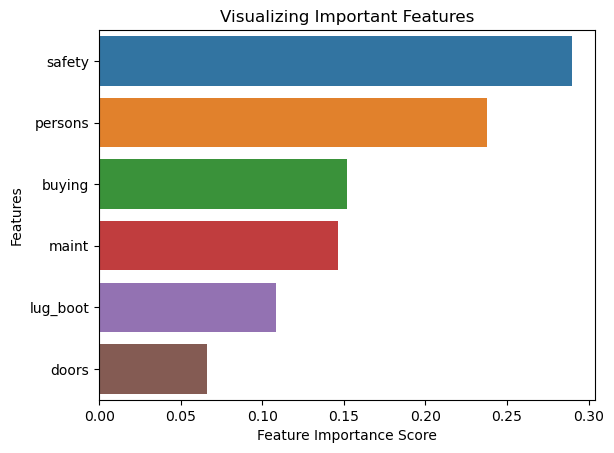

In [23]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# Model RandomForestClassifier Created with 1000 Trees

In [24]:
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [26]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [27]:
clf = RandomForestClassifier(n_estimators=1000,random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9368


# Confusion Matrix for 10000 Trees

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_10000)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[122   2   2   1]
 [  1  13   3   1]
 [  2   0 397   0]
 [  4   1   0  21]]


# Confusion Matrix  Visualization for 10000 Trees

<Axes: >

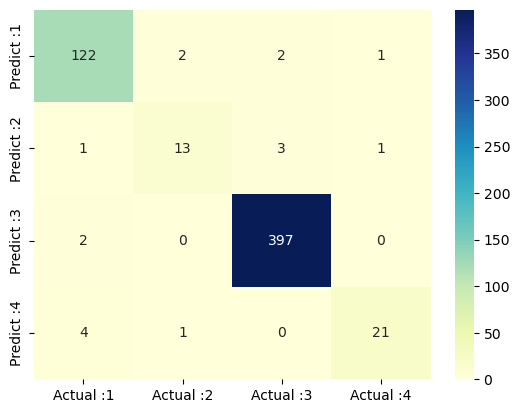

In [29]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :1', 'Actual :2','Actual :3','Actual :4'], 
                                 index=['Predict :1', 'Predict :2','Predict :3','Predict :4'])
sns.heatmap(cm_matrix,annot=True,fmt='d', cmap='YlGnBu')

# classification_report for 10000 Trees

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_10000))

              precision    recall  f1-score   support

         acc       0.95      0.96      0.95       127
        good       0.81      0.72      0.76        18
       unacc       0.99      0.99      0.99       399
       vgood       0.91      0.81      0.86        26

    accuracy                           0.97       570
   macro avg       0.91      0.87      0.89       570
weighted avg       0.97      0.97      0.97       570

